# Predicting of B-cell Epitopes for Vaccine Design

### Overview
- Antibodies are protein molecules used routinely for clinical therapeutic, diagnostic, and research purposes due to their unique recognizing and binding sites of antigen. This typical location of the antibody uses to recognize the antigen called paratope. The B-cell is produced antibodies to make us health and prevent from pathogens. The pathoges has spetial antigen binding site to link on the antibodies using the most complex proteinaceous structure of the epitope. Predicting the exact epitopes has great interest and huge potential for new vaccine design, disease prevention, diagnosis, and treatment. This study explored the best predictive model/s based on trained biochemical amino acid sequence fragment properties of the protein regions of the B-cell epitopes with grid search.

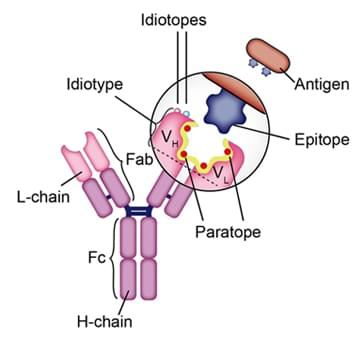
Source: creative-biolabs

### Statement of the Problem
- This work explored the optimal sequence-based predicting model/s for B-cells epitopes based on the physicochemical properties of SARS to suggest the best perfoming model. 

### Summary
- The results of the EDA clearly demonstrated the numeric features of the data. The features of *parent_protein_id*, *protein_seq* and *peptide_seq* the main fingerprint for this work. These categorical features have a very long length of protein sequences (> 350 unique values) at the single line of observation.   These features increased the total number of columns to 16367. This required a large size of computational time and capacity to make the predication. The bassline models were set up in order to select the best performing models for the prediction. The work covered four different selected models with grid search at a threshold of 91%. The threshold helps to get all the possible positive classes of the B-cell epitopes in the prediction. This threshold is the most important business requirement of vaccine development. The obtained results of the grid research were evaluated to make the best prediction of the models. Detailed evaluation of best performing models were addressed in a separate notebook of this work with title (Summary of the work).  

### Contents

These are the contents of the project:

- [1 Load the Dataset](#1-Load-the-Data)
 * [1.1 Importing Libraries](#1.1-Import-the-libraries)
 
- [2.0 Data Exploration](#2.0-Data-Exploration)
 
- [3.0 EDA and Feature Selections](#3.0-EDA-and-Feature-Selections)

- [4.0 Features Engineering](#4.0-Features-Engineering)
     
- [5.0 Model Building](#5.0-Model-Building)
 * [5.1 Setup Baseline Models](#5.1-Setup-Baseline-Models)
 * [5.2 Logistic Regression and Grid Search](#5.2-Logistic-Regression-and-Grid-Search)
 * [5.3 Tensorflow Deep Learing and Grid Search](#5.3-Tensorflow-Deep-Learing-and-Grid-Search)
 * [5.4 Random Forest Classification](#5.4-Random-Forest-Classification)
 * [5.5 XGBoost and Grid Search](#5.5-XGBoost-and-Grid-Search)
      
- [6 Conclusions](#6-Conclusions)



The database contains 14387 unique B-cell epitopes and 520 SARS epitopes with a target value. The test dataset has 20312 observations of different amino acids and peptides sequences together with all the physicochemical properties to make the binding of antigen-antibody interactions. The datasets found from Kaggle and IEDB protein database for epitope predictions (https://www.iedb.org) were cleaned and merge to make them suitable for the prediction.

## 1.0 Load the Dataset

### 1.1 Importing Libraries

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,  roc_auc_score, precision_recall_curve
from sklearn.metrics import roc_auc_score, log_loss, confusion_matrix, classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, precision_score, recall_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers, layers
tf.__version__

'2.3.0'

In [70]:
df_bcell = pd.read_csv('./data/input_bcell.csv')
df_sars = pd.read_csv('./data/input_sars.csv')

df_covid = pd.read_csv('./data/input_covid.csv') #OOT

## 2.0 Data Exploration

In [71]:
df_bcell.head(2)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1


In [72]:
df_sars.head(2)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0


In [73]:
df_covid.head(2)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603


In [74]:
# Dataset will use to train the models
df_bcell.shape

(14387, 14)

In [75]:
# # The B-Cell dataset type
df_bcell.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14387 entries, 0 to 14386
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14387 non-null  object 
 1   protein_seq          14387 non-null  object 
 2   start_position       14387 non-null  int64  
 3   end_position         14387 non-null  int64  
 4   peptide_seq          14387 non-null  object 
 5   chou_fasman          14387 non-null  float64
 6   emini                14387 non-null  float64
 7   kolaskar_tongaonkar  14387 non-null  float64
 8   parker               14387 non-null  float64
 9   isoelectric_point    14387 non-null  float64
 10  aromaticity          14387 non-null  float64
 11  hydrophobicity       14387 non-null  float64
 12  stability            14387 non-null  float64
 13  target               14387 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.5+ MB


In [76]:
# The SARS dataset missed value
df_bcell.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [77]:
# The B-Cell dataset missed value
df_bcell.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [78]:
df_bcell['peptide_seq'].value_counts(normalize=True).head(20)

ARDVLAVVSK         0.000209
YEYLINVIHAFQYV     0.000139
SQWNKPSKPKTN       0.000139
YYALDVYAYDVT       0.000139
GTVVAVGPGRWDEDG    0.000139
CSFWSKYIQTLK       0.000139
LSPVRRDQPLFTFRQ    0.000139
WGQGG              0.000139
VRRDQPLFTFRQVGL    0.000139
YNGEEYLILSARDVL    0.000139
FAVLKLMGRGTKF      0.000139
FRQVGLICERMMKER    0.000139
EVETPIRN           0.000139
TYFSKNYQDYEY       0.000139
DPEDSALL           0.000139
ILYAVFK            0.000139
STEGNVTGMFA        0.000139
RDRDRDRE           0.000139
FKLEKEVAE          0.000139
DVVYALKRQGRTLYG    0.000139
Name: peptide_seq, dtype: float64

In [79]:
df_bcell['peptide_seq'].nunique()

14362

In [80]:
# Dataset will use to train the models
df_sars.shape

(520, 14)

In [81]:
df_sars.head(2)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0


In [82]:
# Dataset will use to predict the trained model
df_covid.shape

(20312, 13)

In [83]:
df_covid.head(2)

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.72,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.58,6.03595,0.10929,-0.138642,31.377603


In [84]:
# Combine the two datasets
df = pd.concat([df_bcell,df_sars]).reset_index(drop=True)
df.shape

(14907, 14)

In [85]:
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [86]:
df_covid.columns

Index(['parent_protein_id', 'protein_seq', 'start_position', 'end_position',
       'peptide_seq', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker',
       'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability'],
      dtype='object')

## 3.0 EDA and Feature Selections

In [87]:
#Check the baseline of the df_sars data
df_sars['target'].value_counts(normalize=True)

0    0.730769
1    0.269231
Name: target, dtype: float64

In [88]:
#Check the baseline of the df_bcell data
df_bcell['target'].value_counts(normalize=True)

0    0.728783
1    0.271217
Name: target, dtype: float64

In [89]:
#Check the baseline of the combined data
baseline=df['target'].value_counts(normalize=True)
baseline

0    0.728852
1    0.271148
Name: target, dtype: float64

Note:
- The baselines values of the combined and individual Dataframe around on the same values.

In [90]:
cols = ['chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker','isoelectric_point', 
        'aromaticity', 'hydrophobicity', 'stability']
target = ['target']

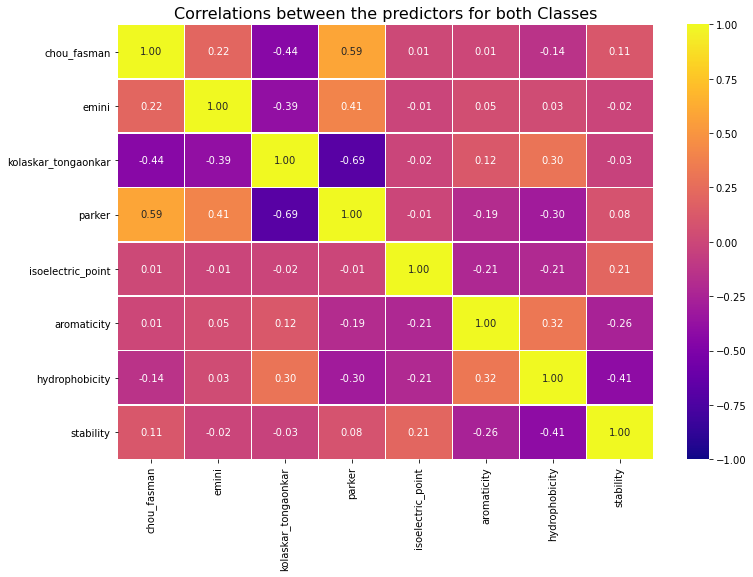

In [91]:
# Corr of combined DataFrame
df1=df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(df1,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations between the predictors for both Classes',fontsize=16);

Note:
- The majorities has lower values correlatation. No need to change any of the features.

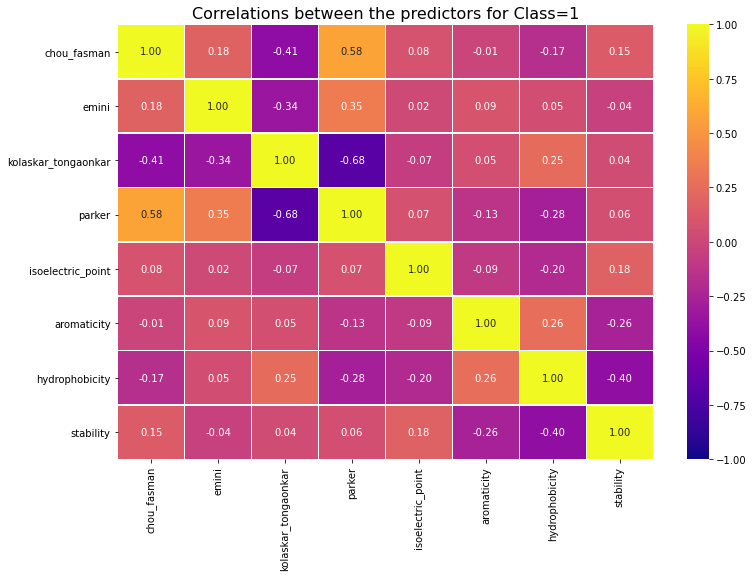

In [92]:
# Correlation of only one class
df2=df[df['target']==1][cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(df2,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations between the predictors for Class=1',fontsize=16);

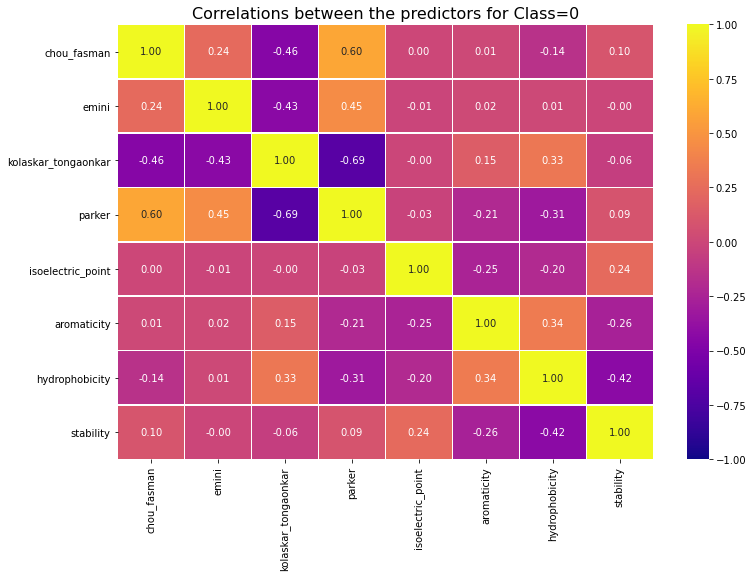

In [93]:
# Correlation of only one class
df3=df[df['target']==0][cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(df3,annot=True, fmt='.2f',linewidths=.5, vmin=-1, vmax=1,cmap='plasma')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('tight')
plt.title('Correlations between the predictors for Class=0',fontsize=16);

In [94]:
#Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_position,14907.0,308.845173,358.433563,1.000000,86.000000,197.000000,400.000000,3079.000000
end_position,14907.0,319.519420,358.647859,6.000000,96.000000,208.000000,411.000000,3086.000000
chou_fasman,14907.0,0.994906,0.123656,0.534000,0.913000,0.991000,1.073000,1.546000
emini,14907.0,1.082811,1.826098,0.000000,0.244000,0.551000,1.208500,40.605000
kolaskar_tongaonkar,14907.0,1.021808,0.053430,0.838000,0.987000,1.021000,1.055000,1.255000
parker,14907.0,1.750098,1.954424,-9.029000,0.600000,1.775000,2.960000,9.120000
isoelectric_point,14907.0,7.015227,1.875713,3.686096,5.569763,6.447815,8.676575,12.232727
aromaticity,14907.0,0.077143,0.026388,0.000000,0.062500,0.075949,0.093458,0.182254
hydrophobicity,14907.0,-0.394063,0.392808,-1.971171,-0.600131,-0.318259,-0.189591,1.267089
stability,14907.0,43.337674,16.501627,5.448936,31.725753,41.948275,49.101172,137.046667


In [95]:
#Calculating feature importance
X = df.drop(['target', 'parent_protein_id', 'protein_seq', 'peptide_seq'], axis = 1)
y = df['target']
forest_clf = ExtraTreesClassifier(n_estimators=250, random_state=420)
forest_clf.fit(X,y)

ExtraTreesClassifier(n_estimators=250, random_state=420)

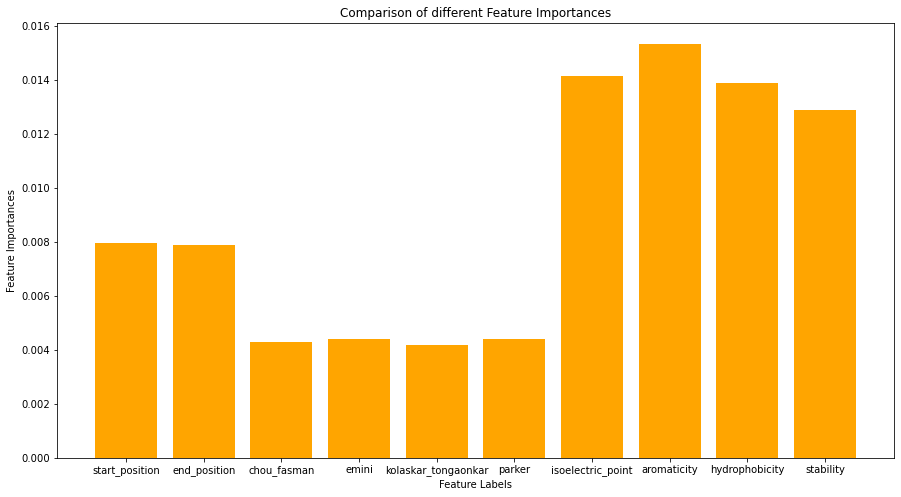

In [96]:
# Create graph of the importance features
imp_features = forest_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest_clf.estimators_], axis = 0)
 
plt.figure(figsize = (15,8))
plt.bar(X.columns, std, color = 'Orange') 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

Note:
- The columns in the range of isoelectric to the stability are relatively the most important numeric features to use in model development.


In [97]:
# Assign importants features
important_feature = df[["isoelectric_point", "aromaticity", "hydrophobicity", "stability"]]

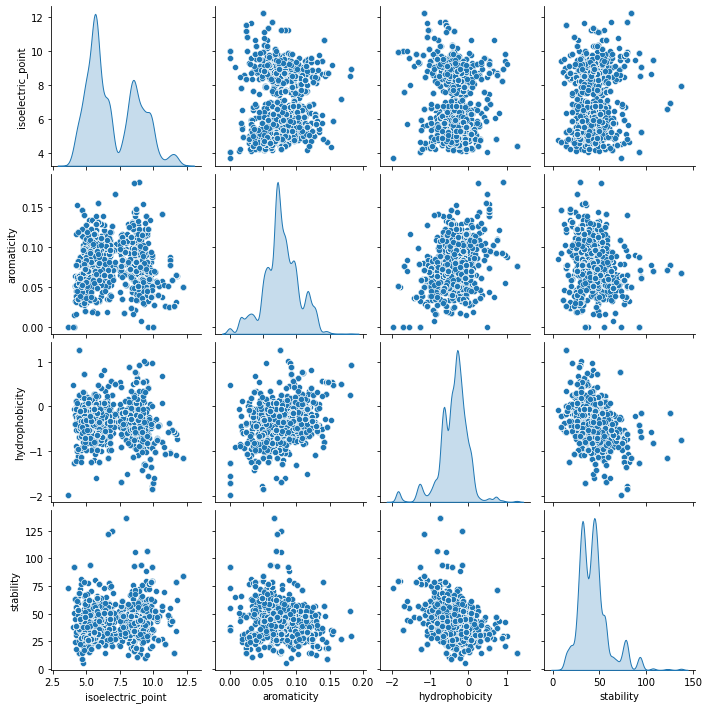

In [98]:
# A selected important feature data distributions 
sns.pairplot(important_feature, diag_kind="kde")

The figures shows the whole ndata distribution of numeric features of the dataset

## 4.0 Features Engineering

## OneHoteEncoding

In [99]:
dm1 = pd.get_dummies(df['parent_protein_id'], drop_first=True)
dm2 = pd.get_dummies(df['protein_seq'], drop_first=True)
dm3 = pd.get_dummies(df['peptide_seq'], drop_first=True)

df_ = pd.concat([df,dm1,dm2,dm3], axis=1)

In [100]:
X = df_.drop(['parent_protein_id', 'protein_seq', 'peptide_seq', 'target'], axis=1)
y = df_['target']

In [101]:
X.head()

,start_position,end_position,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,...,YYFTDEYIAA,YYLIPVASSSKDV,YYLQFCQGQKSSLTP,YYPDEIFRSDTLYLT,YYPSKNLAPI,YYQKWMEE,YYQSAGRNSWNC,YYREMFAHH,YYRMMQTV,YYVPLGTQYT
0,161,165,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,...,0,0,0,0,0,0,0,0,0,0
1,251,255,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,...,0,0,0,0,0,0,0,0,0,0
2,145,149,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,...,0,0,0,0,0,0,0,0,0,0
3,152,156,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,...,0,0,0,0,0,0,0,0,0,0
4,85,89,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,...,0,0,0,0,0,0,0,0,0,0


### Splitting the data set into training and test data sets

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify= y)

X_train, X_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True)

y_train, y_test, = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sd = sc.fit_transform(X_train.values)
X_test_sd = sc.transform(X_test.values)

In [104]:
X_train.shape

(11925, 16367)

In [105]:
print("Number features in the train dataset: ", X_train.shape)
print("Number of the Output in the train dataset: ", y_train.shape)
print("Number features in the test dataset: ", X_test.shape)
print("Number of the Output test dataset: ", y_test.shape)

Number features in the train dataset:  (11925, 16367)
Number of the Output in the train dataset:  (11925,)
Number features in the test dataset:  (2982, 16367)
Number of the Output test dataset:  (2982,)


## 5.0 Model Building 

### 5.1 Setup Baseline Models

### Initialize Pycaret Environment Setup

In [23]:
from pycaret.classification import *
clf = setup(df, target = 'target', normalize=True, fold=5, remove_outliers=True, session_id=123)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14907, 14)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


###  Compare Baseline Models

In [ ]:
best_model = compare_models()

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,03:57:17
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8521,0.8819,0.5047,0.7956,0.6174,0.5314,0.5526,13.1440
rf,Random Forest Classifier,0.8468,0.8807,0.4770,0.7935,0.5956,0.5082,0.5334,6.7320
ridge,Ridge Classifier,0.8457,0.0000,0.5188,0.7530,0.6141,0.5217,0.5360,11.8500
lr,Logistic Regression,0.8416,0.8649,0.4932,0.7524,0.5956,0.5024,0.5198,6.9860
svm,SVM - Linear Kernel,0.8414,0.0000,0.5004,0.7455,0.5985,0.5045,0.5202,3.0160
knn,K Neighbors Classifier,0.8251,0.8268,0.5055,0.6740,0.5775,0.4701,0.4779,35.1780
dt,Decision Tree Classifier,0.8233,0.7324,0.5597,0.6462,0.5998,0.4872,0.4893,1.1020
gbc,Gradient Boosting Classifier,0.8190,0.8387,0.3123,0.8014,0.4493,0.3651,0.4234,19.7380
ada,Ada Boost Classifier,0.8100,0.8300,0.3609,0.6897,0.4728,0.3707,0.4001,6.4000
lda,Linear Discriminant Analysis,0.3035,0.2586,0.1701,0.2003,0.1808,0.1203,0.1227,219.8640


### 5.2 Logistic Regression and Grid Search

###  Logistic Regression to the Training set

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=600)
lr.fit(X_train_sd, y_train)

LogisticRegression(max_iter=600)

### Predicting the Test set LG Model

In [39]:
y_predlr = lr.predict(X_test_sd)

### Making the Confusion Matrix of LG Model

In [40]:
print(confusion_matrix(y_test, y_predlr))  
print(accuracy_score(y_test, y_predlr)) 
print(classification_report(y_test,y_predlr))

[[2093   80]
 [ 462  347]]
0.818242790073776
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      2173
           1       0.81      0.43      0.56       809

    accuracy                           0.82      2982
   macro avg       0.82      0.70      0.72      2982
weighted avg       0.82      0.82      0.80      2982



In [41]:
print("Logistic Regression\n")
print("Accuracy: ", accuracy_score(y_test, y_predlr))
print("Precision: ", precision_score(y_test, y_predlr))
print("Recall:   ", recall_score(y_test, y_predlr))

Logistic Regression

Accuracy:  0.818242790073776
Precision:  0.8126463700234192
Recall:    0.4289245982694685


### Applying k-Fold Cross Validation of LG Model

In [42]:
accuracies = cross_val_score(estimator = lr, X = X_train_sd, y = y_train, cv = 5)
y_predlr1lr = cross_val_predict(estimator = lr, X = X_train_sd, y = y_train, cv = 5)
print(f'cm: {confusion_matrix(y_train, y_predlr1lr)}')
print(f'Mean accuracy: {accuracies.mean()}')
print(f'Std dev: {accuracies.std()}')

cm: [[8377  315]
 [1947 1286]]
Mean accuracy: 0.810314465408805
Std dev: 0.0074609564509971315


In [43]:
cm_lr = confusion_matrix(y_test, y_predlr)
cm_lr

array([[2093,   80],
       [ 462,  347]], dtype=int64)

<AxesSubplot:>

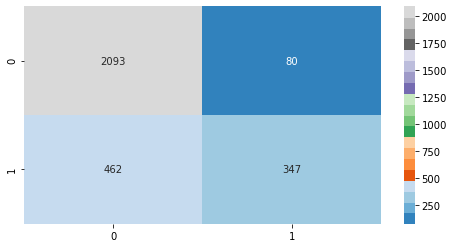

In [44]:
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_lr, annot=True, cmap="tab20c", fmt='d')

###  Logistic Regression Grid Search

In [1]:
## This LG gride search help o find the best output

# def threshold_search(y_true, y_proba):
#     precision, recall, thresholds=precision_recall_curve(y_true, y_proba)
#     thresholds=np.append(thresholds, 1.001)
#     best_th91=thresholds[np.argmax(recall<=0.91)]
#     return best_th91

# param_grid = {'C': [0.1, 1, 10, 100, 1000]} 

# res = {
#       'C':[],
#       'threshd':[],
#       'accuracy_train':[],
#       'auc_train':[],
#       'recall_train':[],
#       'precision_train':[],
#       'auc_test':[],
#       'accuracy_test':[],
#       'recall_test':[],
#       'precision_test':[]
#       }
# step0 = 0

# for n in param_grid['C']:
#     step0 +=1
#     print('Step %d of %d'%(step0, len(param_grid['C'])))
#     clf = LogisticRegression(random_state=123, C=n, max_iter=1e5, solver='lbfgs')
#     clf.fit(X_train, y_train)
#     y_pred_prob_itt = clf.predict_proba(X_train_sd)[:,1]
#     threshd=threshold_search(y_train, y_pred_prob_itt)
#     confmat=confusion_matrix(y_true=y_train, y_pred=y_pred_prob_itt>threshd)
#     tn, fp, fn, tp = confmat.ravel()

#     res['C'].append(n)
#     res['threshd'].append(np.round(threshd,4))
#     res['auc_train'].append(np.round(roc_auc_score(y_train,y_pred_prob_itt),2))
#     res['accuracy_train'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
#     res['recall_train'].append(np.round(tp/(tp+fn),2))
#     res['precision_train'].append(np.round(tp/(tp+fp),2))

#     y_pred_prob_itv = clf.predict_proba(X_test_sd)[:,1]
#     confmat=confusion_matrix(y_true=y_test, y_pred=y_pred_prob_itv>threshd)
#     tn, fp, fn, tp = confmat.ravel()
#     res['auc_test'].append(np.round(roc_auc_score(y_test,y_pred_prob_itv),2))
#     res['accuracy_test'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
#     res['recall_test'].append(np.round(tp/(tp+fn),2))
#     res['precision_test'].append(np.round(tp/(tp+fp),2))

In [46]:
pd.set_option('display.max_rows',5000)
res_lr = pd.DataFrame.from_dict(res)
res_lr.sort_values('recall_test', ascending=False)

,C,threshd,accuracy_train,auc_train,recall_train,precision_train,auc_test,accuracy_test,recall_test,precision_test
0,0.1,0.9324,0.92,0.97,0.91,0.83,0.87,0.82,0.72,0.66
1,1.0,1.0010,0.73,1.00,0.00,NaN,0.83,0.73,0.00,NaN
2,10.0,1.0010,0.73,1.00,0.00,NaN,0.81,0.73,0.00,NaN
3,100.0,1.0010,0.73,1.00,0.00,NaN,0.72,0.73,0.00,NaN
4,1000.0,1.0010,0.73,1.00,0.00,NaN,0.66,0.73,0.00,NaN


###  Receiver Operating Characteristic (ROC) Curve

Area Under the Curve: 0.7


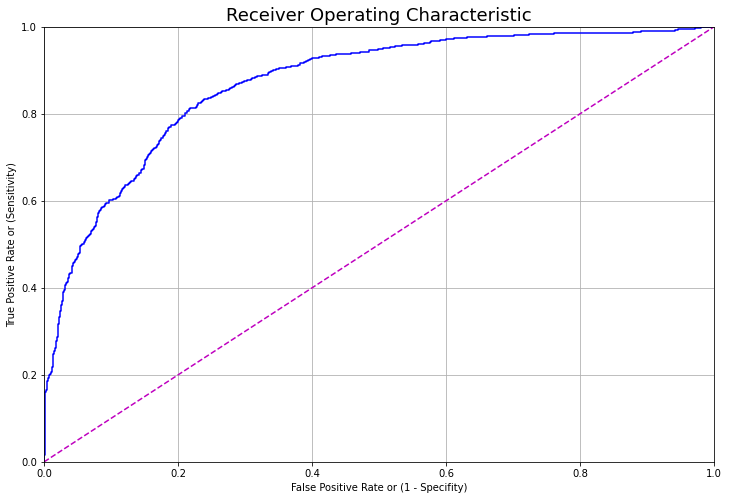

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
#Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test_sd)[:, 1])
auc = np.round(roc_auc_score(y_test, np.where(np.round(lr.predict_proba(X_test_sd)[:, 1], 2)>=0.50, 1.0,0)), 2)
print(f'Area Under the Curve: {auc}')
# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'm--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic', fontsize=18);

 ### 5.3 Tensorflow Deep Learing and Grid Search

In [106]:
# To determine the inpute shape of the layers
X.shape

(14907, 16367)

In [108]:
TF = Sequential()
TF.add(Dense(units=6, activation='relu', kernel_initializer='normal', input_shape=(X_train_sd.shape[1], )))# Adding the first layer (Dense layer)
TF.add(Dropout(0.25)) #Adding a Dropout layer

TF.add(Dense(units=6, activation='relu', kernel_initializer='normal'))
TF.add(Dropout(0.25)) #Adding a Dropout layer

TF.add(Dense(units=1, activation='sigmoid'))
#Compiling model
TF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
TF.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 6)                 98208     
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_3 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 98,257
Trainable params: 98,257
Non-trainable params: 0
_________________________________________________________________


### Adding Earlystopping

In [109]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3) 

In [110]:
TF.fit(x=X_train_sd, y=y_train, batch_size=64, epochs=600, validation_data=(X_test_sd, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
187/187 [==============================] - 3s 17ms/step - loss: 0.6575 - accuracy: 0.6815 - val_loss: 0.5638 - val_accuracy: 0.7287
Epoch 2/600
187/187 [==============================] - 2s 10ms/step - loss: 0.5979 - accuracy: 0.7282 - val_loss: 0.5391 - val_accuracy: 0.7287
Epoch 3/600
187/187 [==============================] - 2s 10ms/step - loss: 0.5584 - accuracy: 0.7289 - val_loss: 0.5130 - val_accuracy: 0.7287
Epoch 4/600
187/187 [==============================] - 2s 10ms/step - loss: 0.5158 - accuracy: 0.7289 - val_loss: 0.4883 - val_accuracy: 0.7287
Epoch 5/600
187/187 [==============================] - 2s 10ms/step - loss: 0.4771 - accuracy: 0.7289 - val_loss: 0.4732 - val_accuracy: 0.7287
Epoch 6/600
187/187 [==============================] - 2s 10ms/step - loss: 0.4406 - accuracy: 0.7289 - val_loss: 0.4597 - val_accuracy: 0.7287
Epoch 7/600
187/187 [==============================] - 2s 10ms/step - loss: 0.4048 - accuracy: 0.7289 - val_loss: 0.4663 - val_accuracy:

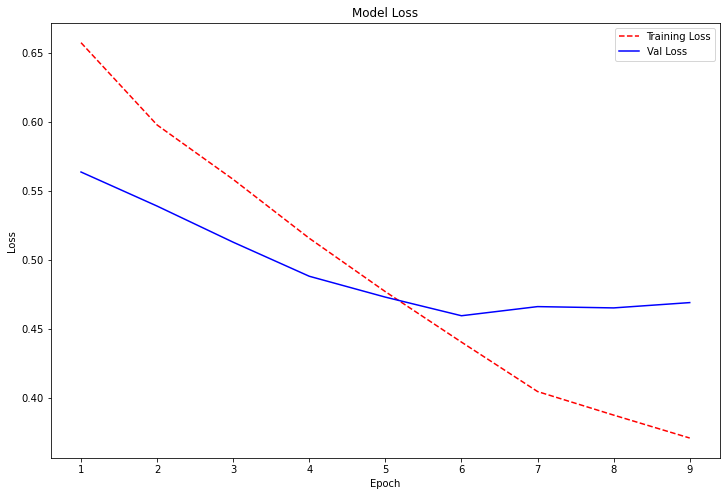

In [111]:
model_loss = pd.DataFrame(TF.history.history)
epocx = range(1, len( model_loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epocx, model_loss['loss'], 'r--', epocx, model_loss['val_loss'],'b-'); #model_loss[['loss','val_loss']]
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss');

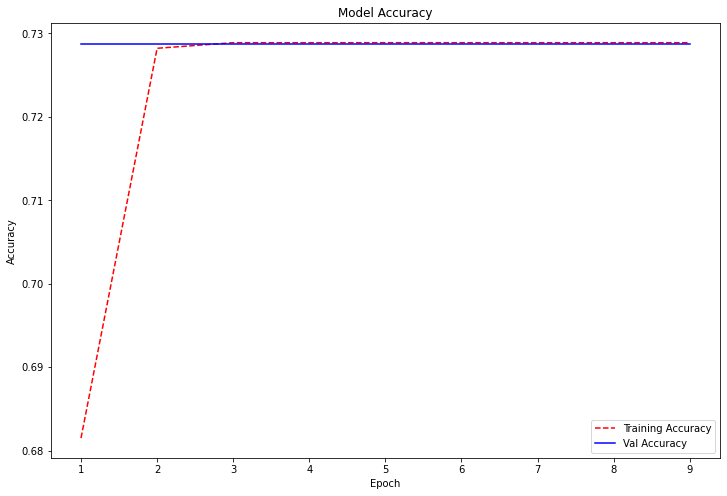

In [112]:
plt.figure(figsize=(12,8))
plt.plot(epocx, model_loss['accuracy'], 'r--', epocx, model_loss['val_accuracy'],'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy');

In [55]:
TF.fit(X_train_sd, y_train, batch_size = 64, epochs=4);

Epoch 1/4
187/187 [==============================] - 2s 9ms/step - loss: 0.2738 - accuracy: 0.8674
Epoch 2/4
187/187 [==============================] - 1s 8ms/step - loss: 0.2172 - accuracy: 0.9094
Epoch 3/4
187/187 [==============================] - 1s 7ms/step - loss: 0.1902 - accuracy: 0.9203
Epoch 4/4
187/187 [==============================] - 1s 7ms/step - loss: 0.1717 - accuracy: 0.9277


### Model Evaluation

### TF >>>> Predict the response for test and train datasets

In [2]:
## To display the score of accuracy, recall and precision of the unseen dataset
# print("Test data set: TensorFlow Keras\n")
# print("Accuracy: ", accuracy_score(y_test, np.where(TF.predict(X_test_sd)>0.5,1,0)))
# print("Precision: ", precision_score(y_test, np.where(TF.predict(X_test_sd)>0.5,1,0)))
# print("Recall:   ", recall_score(y_test, np.where(TF.predict(X_test_sd)>0.5,1,0)))

In [3]:
## To display the score of accuracy, recall and precision of the train dataset
# print("Training date set: TensorFlow Keras\n")
# print("Accuracy: ", accuracy_score(y_train, np.where(TF.predict(X_train_sd)>0.5,1,0)))
# print("Precision: ", precision_score(y_train, np.where(TF.predict(X_train_sd)>0.5,1,0)))
# print("Recall:   ", recall_score(y_train, np.where(TF.predict(X_train_sd)>0.5,1,0)))

### Principal Component Analysis

In [116]:
# For reduction of the samples to make easy for the NN
from sklearn.decomposition import PCA
pca = PCA(n_components=0.75)

In [117]:
X_train_sd2 = pca.fit_transform(X_train_sd)
X_test_sd2 = pca.transform(X_test_sd)

In [118]:
X_train_sd2.shape

(11925, 8564)

In [119]:
pca.explained_variance_ratio_

array([4.06579736e-04, 3.58823765e-04, 3.00353606e-04, ...,
       7.53813119e-05, 7.53813119e-05, 7.53813119e-05])

In [120]:
pca.explained_variance_ratio_.sum()

0.7500321170950017

In [121]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print("Total explained variance = "+str(pca.explained_variance_ratio_.sum()))

[5.39454573 4.76091412 3.98512548 ... 1.00016774 1.00016774 1.00016774]
[4.06579736e-04 3.58823765e-04 3.00353606e-04 ... 7.53813119e-05
 7.53813119e-05 7.53813119e-05]
Total explained variance = 0.7500321170950017


In [122]:
TF = Sequential()
TF.add(Dense(units=6, activation='relu', kernel_regularizer=regularizers.L2(0.01), kernel_initializer='normal', input_shape=(X_train_sd2.shape[1], )))
TF.add(Dropout(0.25)) #Adding a Dropout layer
# Another hidden layer units
TF.add(Dense(units=10, activation='relu',kernel_regularizer=regularizers.L2(0.01),  kernel_initializer='normal'))
TF.add(Dropout(0.25)) #Adding a Dropout layer
# Output layer with a binary classification 
TF.add(Dense(units=1, activation='sigmoid'))
#Compiling model
TF.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
TF.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 6)                 51390     
_________________________________________________________________
dropout_4 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                70        
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 51,471
Trainable params: 51,471
Non-trainable params: 0
_________________________________________________________________


In [123]:
TF.fit(x=X_train_sd2, y=y_train, batch_size=512, epochs=600, validation_data=(X_test_sd2, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/600
24/24 [==============================] - 2s 64ms/step - loss: 1.6321 - accuracy: 0.7065 - val_loss: 1.3619 - val_accuracy: 0.7287
Epoch 2/600
24/24 [==============================] - 0s 19ms/step - loss: 1.1484 - accuracy: 0.7290 - val_loss: 1.0200 - val_accuracy: 0.7287
Epoch 3/600
24/24 [==============================] - 0s 19ms/step - loss: 0.8773 - accuracy: 0.7290 - val_loss: 0.8229 - val_accuracy: 0.7287
Epoch 4/600
24/24 [==============================] - 0s 21ms/step - loss: 0.6975 - accuracy: 0.7289 - val_loss: 0.7024 - val_accuracy: 0.7287
Epoch 5/600
24/24 [==============================] - 0s 20ms/step - loss: 0.5735 - accuracy: 0.7289 - val_loss: 0.6253 - val_accuracy: 0.7287
Epoch 6/600
24/24 [==============================] - 0s 19ms/step - loss: 0.4794 - accuracy: 0.7289 - val_loss: 0.5766 - val_accuracy: 0.7287
Epoch 7/600
24/24 [==============================] - 0s 19ms/step - loss: 0.4277 - accuracy: 0.7291 - val_loss: 0.5484 - val_accuracy: 0.7287
Epoch 

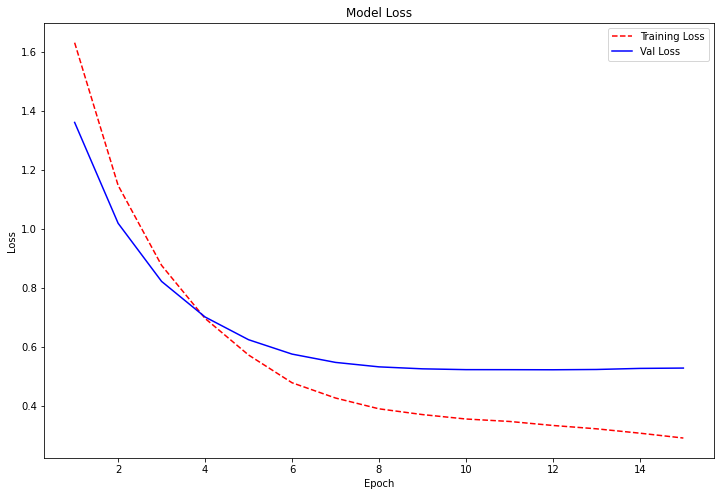

In [124]:
model_loss = pd.DataFrame(TF.history.history)
epocx = range(1, len( model_loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epocx, model_loss['loss'], 'r--', epocx, model_loss['val_loss'],'b-'); #model_loss[['loss','val_loss']]
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss');

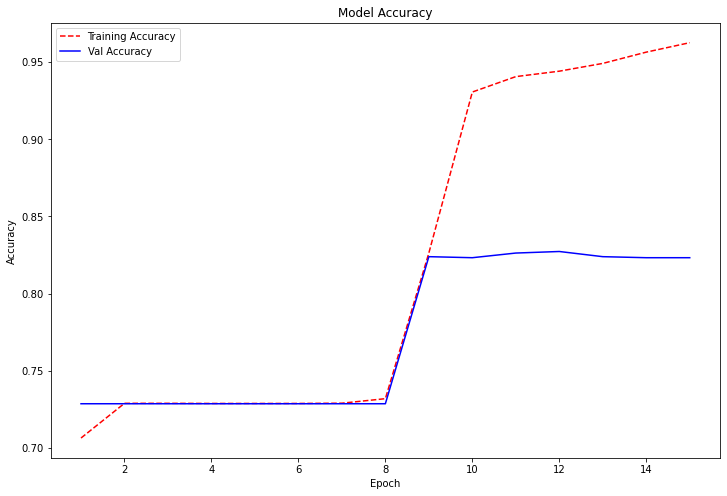

In [125]:
plt.figure(figsize=(12,8))
plt.plot(epocx, model_loss['accuracy'], 'r--', epocx, model_loss['val_accuracy'],'b-')
plt.legend(['Training Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy');

In [126]:
TF.fit(X_train_sd2, y_train, batch_size = 512, epochs=7);

Epoch 1/7
24/24 [==============================] - 0s 15ms/step - loss: 0.2789 - accuracy: 0.9639
Epoch 2/7
24/24 [==============================] - 0s 16ms/step - loss: 0.2690 - accuracy: 0.9608
Epoch 3/7
24/24 [==============================] - 0s 16ms/step - loss: 0.2628 - accuracy: 0.9647
Epoch 4/7
24/24 [==============================] - 0s 16ms/step - loss: 0.2592 - accuracy: 0.9619
Epoch 5/7
24/24 [==============================] - 0s 15ms/step - loss: 0.2538 - accuracy: 0.9644
Epoch 6/7
24/24 [==============================] - 0s 16ms/step - loss: 0.2580 - accuracy: 0.9633
Epoch 7/7
24/24 [==============================] - 0s 16ms/step - loss: 0.2565 - accuracy: 0.9599


### Model Performance after PCA Applied

In [127]:
print("Test data set: TensorFlow Keras\n")
print("Accuracy: ", accuracy_score(y_test, np.where(TF.predict(X_test_sd2)>0.4355,1,0)))
print("Precision: ", precision_score(y_test, np.where(TF.predict(X_test_sd2)>0.4355,1,0)))
print("Recall:   ", recall_score(y_test, np.where(TF.predict(X_test_sd2)>0.4355,1,0)))

Test data set: TensorFlow Keras

Accuracy:  0.8145539906103286
Precision:  0.6772853185595568
Recall:    0.6044499381953028


In [128]:
print("Training date set: TensorFlow Keras\n")
print("Accuracy: ", accuracy_score(y_train, np.where(TF.predict(X_train_sd2)>0.5,1,0)))
print("Precision: ", precision_score(y_train, np.where(TF.predict(X_train_sd2)>0.5,1,0)))
print("Recall:   ", recall_score(y_train, np.where(TF.predict(X_train_sd2)>0.5,1,0)))

Training date set: TensorFlow Keras

Accuracy:  0.9929559748427673
Precision:  0.9897356143079316
Recall:    0.9842251778533869


### Tensorflow Grid Search

In [129]:
#Set threshold value at 91%
def threshold_search(y_true, y_proba):
    precision, recall, thresholds=precision_recall_curve(y_true, y_proba)
    thresholds=np.append(thresholds, 1.001)
    best_th91=thresholds[np.argmax(recall<=0.91)]
    return best_th91

In [130]:
param_grid = {'epochs':    [6, 7, 8], 
              'layers1_n': [6,8,10],
              'layers2_n': [6,8,10]
              }

In [131]:
tf.random.set_seed(1)
res = {'epochs':[],
       'layers1_n':[],
       'layers2_n':[],
       'threshd':[],
       'auc_train':[],
       'accuracy_train':[],
       'recall_train':[],
       'precision_train':[],
       'auc_test':[],
       'accuracy_test':[],
       'recall_test':[],
       'precision_test':[]
      }
step0 = 0
for m in param_grid['epochs']:
    for n in param_grid['layers1_n']:
        for j in param_grid['layers2_n']:
            step0 +=1
            print('Step %d of %d'%(step0, len(param_grid['epochs'])*len(param_grid['layers1_n'])*len(param_grid['layers2_n'])))
            clf = Sequential()
            #layer 1
            clf.add(Dense(units=n, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.L2(0.01),input_shape=(X_train_sd2.shape[1], )))
            clf.add(Dropout(0.25)) 
            #layer 2
            clf.add(Dense(units=j, activation='relu', kernel_regularizer=regularizers.L2(0.01), kernel_initializer='normal'))
            clf.add(Dropout(0.25)) #Adding a Dropout layer
            #output
            clf.add(Dense(units=1, activation='sigmoid'))
            #Compiling model
            clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
            clf.fit(X_train_sd2, y_train, batch_size = 512, epochs=m);
            y_pred_prob_itt = clf.predict_proba(X_train_sd2)
            
            threshd=threshold_search(y_train, y_pred_prob_itt)
            confmat=confusion_matrix(y_true=y_train, y_pred=y_pred_prob_itt>threshd)
            tn, fp, fn, tp = confmat.ravel()
            res['epochs'].append(m)
            res['layers1_n'].append(n)
            res['layers2_n'].append(j)
            res['threshd'].append(np.round(threshd,4))
            res['auc_train'].append(np.round(roc_auc_score(y_train,y_pred_prob_itt),2))
            res['accuracy_train'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
            res['recall_train'].append(np.round(tp/(tp+fn),2))
            res['precision_train'].append(np.round(tp/(tp+fp),2))

            y_pred_prob_itv = clf.predict_proba(X_test_sd2)
            confmat=confusion_matrix(y_true=y_test, y_pred=y_pred_prob_itv>threshd)
            tn, fp, fn, tp = confmat.ravel()
            res['auc_test'].append(np.round(roc_auc_score(y_test,y_pred_prob_itv),2))
            res['accuracy_test'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
            res['recall_test'].append(np.round(tp/(tp+fn),2))
            res['precision_test'].append(np.round(tp/(tp+fp),2))

Step 1 of 27
Epoch 1/6
24/24 [==============================] - 0s 17ms/step - loss: 1.6279 - accuracy: 0.7018
Epoch 2/6
24/24 [==============================] - 1s 21ms/step - loss: 1.1469 - accuracy: 0.7282
Epoch 3/6
24/24 [==============================] - 0s 20ms/step - loss: 0.8828 - accuracy: 0.7289
Epoch 4/6
24/24 [==============================] - 0s 19ms/step - loss: 0.7344 - accuracy: 0.7289
Epoch 5/6
24/24 [==============================] - 1s 21ms/step - loss: 0.6318 - accuracy: 0.7289
Epoch 6/6
24/24 [==============================] - 0s 18ms/step - loss: 0.5663 - accuracy: 0.7289
Instructions for updating:
Please use `model.predict()` instead.
Step 2 of 27
Epoch 1/6
24/24 [==============================] - 0s 16ms/step - loss: 1.6455 - accuracy: 0.6984
Epoch 2/6
24/24 [==============================] - 0s 19ms/step - loss: 1.1662 - accuracy: 0.7259
Epoch 3/6
24/24 [==============================] - 0s 15ms/step - loss: 0.8925 - accuracy: 0.7279
Epoch 4/6
24/24 [==========

In [132]:
pd.set_option('display.max_rows',5000)
res_TF = pd.DataFrame.from_dict(res)
res_TF.sort_values('recall_test', ascending=False)

,epochs,layers1_n,layers2_n,threshd,auc_train,accuracy_train,recall_train,precision_train,auc_test,accuracy_test,recall_test,precision_test
3,6,8,6,0.4160,0.99,0.96,0.91,0.93,0.85,0.79,0.71,0.60
2,6,6,10,0.3991,0.99,0.97,0.91,0.97,0.86,0.82,0.61,0.68
0,6,6,6,0.4153,0.99,0.96,0.91,0.95,0.85,0.82,0.60,0.69
8,6,10,10,0.4034,1.00,0.97,0.91,0.99,0.86,0.82,0.60,0.70
12,7,8,6,0.4219,0.99,0.96,0.91,0.92,0.85,0.82,0.59,0.69
4,6,8,8,0.4114,0.99,0.96,0.91,0.96,0.85,0.82,0.59,0.69
1,6,6,8,0.4116,0.99,0.97,0.91,0.98,0.85,0.82,0.59,0.69
7,6,10,8,0.4109,1.00,0.97,0.91,0.99,0.86,0.81,0.58,0.68
17,7,10,10,0.4369,1.00,0.97,0.91,0.99,0.86,0.82,0.58,0.71
24,8,10,6,0.4365,1.00,0.96,0.87,1.00,0.87,0.82,0.56,0.72


In [133]:
# Using best hyperparameters
tf.random.set_seed(1)

clf_tf_best = Sequential()
#layer 1
clf_tf_best.add(Dense(units=8, activation='relu', kernel_initializer='normal', kernel_regularizer=regularizers.L2(0.01),input_shape=(X_train_sd2.shape[1], )))
clf_tf_best.add(Dropout(0.25)) 
#layer 2
clf_tf_best.add(Dense(units=6, activation='relu', kernel_regularizer=regularizers.L2(0.01), kernel_initializer='normal'))
clf_tf_best.add(Dropout(0.25)) #Adding a Dropout layer
#output
clf_tf_best.add(Dense(units=1, activation='sigmoid'))
#Compiling model
clf_tf_best.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
clf_tf_best.fit(X_train_sd2, y_train, batch_size = 512, epochs=6);

Epoch 1/6
24/24 [==============================] - 0s 17ms/step - loss: 1.9367 - accuracy: 0.6865
Epoch 2/6
24/24 [==============================] - 0s 17ms/step - loss: 1.2885 - accuracy: 0.7252
Epoch 3/6
24/24 [==============================] - 0s 18ms/step - loss: 0.9543 - accuracy: 0.7288
Epoch 4/6
24/24 [==============================] - 0s 16ms/step - loss: 0.7619 - accuracy: 0.7289
Epoch 5/6
24/24 [==============================] - 0s 18ms/step - loss: 0.6435 - accuracy: 0.7289
Epoch 6/6
24/24 [==============================] - 0s 16ms/step - loss: 0.5640 - accuracy: 0.7289


### Model Performance by Best Hyperparameters

In [134]:
print("Test data set: TensorFlow Keras\n")
print("Accuracy: ", accuracy_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0)))
print("Precision: ", precision_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0)))
print("Recall:   ", recall_score(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0)))

Test data set: TensorFlow Keras

Accuracy:  0.8222669349429913
Precision:  0.722488038277512
Recall:    0.5599505562422744


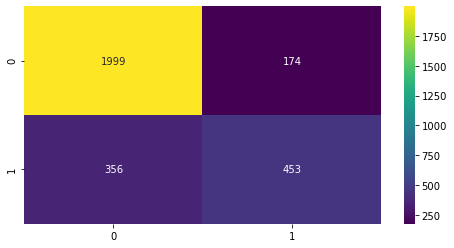

In [135]:
cm_tf = confusion_matrix(y_test, np.where(clf_tf_best.predict(X_test_sd2)>0.4177,1,0))
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_tf, annot=True, cmap="viridis", fmt='d');

### Receiver Operating Characteristic (ROC) Curve

In [136]:
# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(12,8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

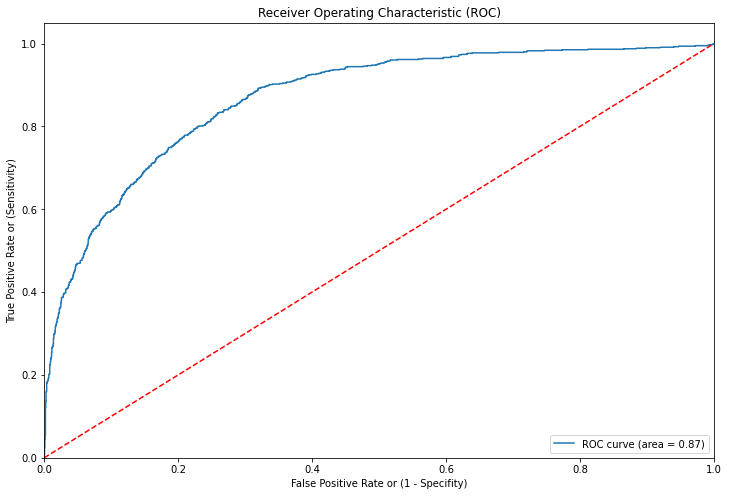

In [137]:
y_predtf = TF.predict(X_test_sd2)
plot_roc(y_predtf,y_test)

### 5.4 Random Forest Classification 

In [174]:
# Train dateset
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8, n_estimators = 50, criterion = 'entropy', random_state = 123) #100, entropy
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=50,
                       random_state=123)

### Predicting the Test set of RF Model

In [175]:
y_predrf = rf.predict(X_test)

### Making the Confusion Matrix of RF Model

In [4]:
# # Confusion matrix of random forest
# print(confusion_matrix(y_test, y_predrf))  
# print(accuracy_score(y_test, y_predrf)) 
# print(classification_report(y_test,y_predrf))

### Applying k-Fold Cross Validation of RF Model

In [177]:
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5)
y_predlr1rf = cross_val_predict(estimator = rf, X = X_train, y = y_train, cv = 5)

print(f'cm: {confusion_matrix(y_train, y_predlr1rf)}')
print(f'Mean accuracy: {accuracies.mean()}')
print(f'Std dev: {accuracies.std()}')

cm: [[8692    0]
 [3233    0]]
Mean accuracy: 0.7288888888888889
Std dev: 0.00020540794488746008


### Applying Grid Search to find the best RF model hyperparameters

In [178]:
param_grid = {'bootstrap': [True], 'criterion': ["entropy"], 'n_estimators': [100, 200, 300], 'max_depth': [5, 6, 8, 10]}
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring = 'accuracy', cv= 5)
grid.fit(X_train, y_train)
means=grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 100}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 200}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 300}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 100}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 200}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 300}
0.729 (+/-0.000) for {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 

In [179]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'n_estimators': 100}

In [180]:
param_grid = {'max_depth':    [5, 6, 7, 8],      # Depth of the tree
              'n_estimators': [100, 200, 300]
              }      

In [181]:
def threshold_search(y_true, y_proba):
    precision, recall, thresholds=precision_recall_curve(y_true, y_proba)
    thresholds=np.append(thresholds, 1.001)
    best_th91=thresholds[np.argmax(recall<=0.91)]
    return best_th91

In [182]:
res = {
      'max_depth':[],
      'n_estimators':[],
      'threshd':[],
      'accuracy_train':[],
      'auc_train':[],
      'recall_train':[],
      'precision_train':[],
      'auc_test':[],
      'accuracy_test':[],
      'recall_test':[],
      'precision_test':[]
      }
step0 = 0
for m in param_grid['max_depth']:
    for n in param_grid['n_estimators']:
        step0 +=1
        print('Step %d of %d'%(step0, len(param_grid['max_depth'])*len(param_grid['n_estimators'])))
        clf = RandomForestClassifier(random_state=42, 
                                     max_depth=m, 
                                     n_estimators=n,
                                     criterion='entropy', 
                                     )
        clf.fit(X_train, y_train)
        y_pred_prob_itt = clf.predict_proba(X_train)[:,1]
        threshd=threshold_search(y_train, y_pred_prob_itt)
        confmat=confusion_matrix(y_true=y_train, y_pred=y_pred_prob_itt>threshd)
        tn, fp, fn, tp = confmat.ravel()
        res['max_depth'].append(m)
        res['n_estimators'].append(n)
        res['threshd'].append(np.round(threshd,4))
        res['auc_train'].append(np.round(roc_auc_score(y_train,y_pred_prob_itt),2))
        res['accuracy_train'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
        res['recall_train'].append(np.round(tp/(tp+fn),2))
        res['precision_train'].append(np.round(tp/(tp+fp),2))

        y_pred_prob_itv = clf.predict_proba(X_test)[:,1]
        confmat=confusion_matrix(y_true=y_test, y_pred=y_pred_prob_itv>threshd)
        tn, fp, fn, tp = confmat.ravel()
        res['auc_test'].append(np.round(roc_auc_score(y_test,y_pred_prob_itv),2))
        res['accuracy_test'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
        res['recall_test'].append(np.round(tp/(tp+fn),2))
        res['precision_test'].append(np.round(tp/(tp+fp),2))

Step 1 of 12
Step 2 of 12
Step 3 of 12
Step 4 of 12
Step 5 of 12
Step 6 of 12
Step 7 of 12
Step 8 of 12
Step 9 of 12
Step 10 of 12
Step 11 of 12
Step 12 of 12


In [183]:
pd.set_option('display.max_rows',5000)
res_rf = pd.DataFrame.from_dict(res)
res_rf.sort_values('recall_test', ascending=False)

,max_depth,n_estimators,threshd,accuracy_train,auc_train,recall_train,precision_train,auc_test,accuracy_test,recall_test,precision_test
0,5,100,0.2649,0.63,0.82,0.91,0.42,0.81,0.63,0.90,0.41
1,5,200,0.2669,0.66,0.83,0.91,0.44,0.82,0.65,0.90,0.43
2,5,300,0.2675,0.67,0.84,0.91,0.44,0.83,0.66,0.90,0.44
4,6,200,0.2668,0.67,0.84,0.91,0.45,0.82,0.66,0.90,0.44
3,6,100,0.2658,0.65,0.83,0.91,0.43,0.81,0.64,0.89,0.42
5,6,300,0.2674,0.67,0.84,0.91,0.45,0.83,0.66,0.89,0.44
6,7,100,0.2648,0.66,0.84,0.91,0.44,0.82,0.64,0.89,0.43
7,7,200,0.2668,0.67,0.85,0.91,0.45,0.83,0.66,0.89,0.44
8,7,300,0.2671,0.67,0.85,0.91,0.45,0.83,0.67,0.89,0.44
9,8,100,0.2643,0.67,0.84,0.91,0.44,0.82,0.65,0.89,0.43


In [184]:
rf_best = RandomForestClassifier(bootstrap = True, criterion='gini', max_depth = 5, n_estimators= 100)
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [185]:
yp_train = rf_best.predict(X_train)

In [186]:
yp_test = rf_best.predict(X_test)

In [187]:
from sklearn import metrics

In [188]:
metrics.accuracy_score(y_train, yp_train)

0.7288888888888889

In [153]:
metrics.accuracy_score(y_test, yp_test)

0.7287055667337358

In [154]:
fpr, tpr, tprhresholds = metrics.roc_curve(y_train, yp_train)
metrics.auc(fpr,tpr)

0.5

<AxesSubplot:>

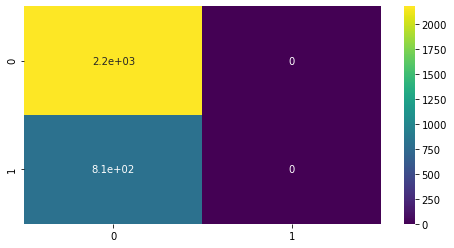

In [159]:
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_rf, annot=True, cmap="viridis")

### Receiver Operating Characteristic (ROC) Curve

Area Under the Curve: 0.5


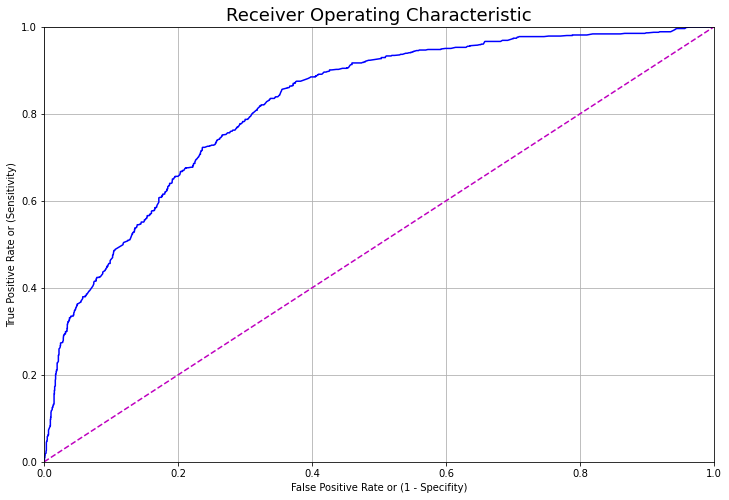

In [189]:
from sklearn.metrics import roc_curve, roc_auc_score
#Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
auc = np.round(roc_auc_score(y_test, np.where(np.round(rf.predict_proba(X_test)[:, 1], 2)>=0.50, 1.0,0)), 2)
print(f'Area Under the Curve: {auc}')
# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'm--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic', fontsize=18);

### 5.5 XGBoost and Grid Search

In [190]:
# To prevent the dropdown of the warning sign after running the grid.
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [191]:
from xgboost import XGBClassifier 
xgb_clf =  XGBClassifier(gamma=1,learning_rate=0.2, max_depth=7,
                         n_estimators=100, eval_metric = "logloss",
                         objective='binary:logistic', random_state=123)
xgb_clf.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

### XGB >>>> Predicting the Train set results

In [192]:
y_predxg_train =  xgb_clf.predict(X_train)

### XGB >>>> Predicting the Test set results

In [193]:
y_predxg = xgb_clf.predict(X_test)

In [194]:
print("Extreme Gradient Boosting\n")
print("Accuracy: ", accuracy_score(y_test, y_predxg))
print("Precision: ", precision_score(y_test, y_predxg))
print("Recall:   ", recall_score(y_test, y_predxg))

Extreme Gradient Boosting

Accuracy:  0.8390342052313883
Precision:  0.7582417582417582
Recall:    0.5970333745364648


In [195]:
print("Training data set: Extreme Gradient Boosting\n")
print("Accuracy: ", accuracy_score(y_train, y_predxg_train))
print("Precision: ", precision_score(y_train, y_predxg_train))
print("Recall:   ", recall_score(y_train, y_predxg_train))

Training data set: Extreme Gradient Boosting

Accuracy:  0.8846960167714885
Precision:  0.8609168609168609
Recall:    0.6854314877822456


### XGB >>> Making the Confusion Matrix

In [196]:
print(confusion_matrix(y_test, y_predxg))  
print(accuracy_score(y_test, y_predxg)) 
print(classification_report(y_test,y_predxg))

[[2019  154]
 [ 326  483]]
0.8390342052313883
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      2173
           1       0.76      0.60      0.67       809

    accuracy                           0.84      2982
   macro avg       0.81      0.76      0.78      2982
weighted avg       0.83      0.84      0.83      2982



### XGB >>>> Applying k-Fold Cross Validation

In [198]:
accuracies = cross_val_score(estimator = xgb_clf, X = X_train, y = y_train, cv = 5)
y_predlr1xgb = cross_val_predict(estimator = xgb_clf, X = X_train, y = y_train, cv = 5)

print(f'cm: {confusion_matrix(y_train, y_predlr1xgb)}')
print(f'Mean accuracy: {accuracies.mean()}')
print(f'Std dev: {accuracies.std()}')

cm: [[8100  592]
 [1317 1916]]
Mean accuracy: 0.8399161425576519
Std dev: 0.0089078552452089


### XGB >>>> Applying Grid Search to find the best model parameters

In [199]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 5,
 'n_estimators': 100}

In [200]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [201]:
def threshold_search(y_true, y_proba):
    precision, recall, thresholds=precision_recall_curve(y_true, y_proba)
    thresholds=np.append(thresholds, 1.001)
    best_th91=thresholds[np.argmax(recall<=0.91)]
    return best_th91

In [202]:
param_grid = {'max_depth':    [5, 6, 7], 
              'n_estimators': [100,200,300]
              }

In [203]:
res = {'max_depth':[],
       'n_estimators':[],
       'threshd':[],
       'auc_train':[],
       'accuracy_train':[],
       'recall_train':[],
       'precision_train':[],
       'auc_test':[],
       'accuracy_test':[],
       'recall_test':[],
       'precision_test':[]
      }
step0 = 0
for m in param_grid['max_depth']:
    for n in param_grid['n_estimators']:
        step0 +=1
        print('Step %d of %d'%(step0, len(param_grid['max_depth'])*len(param_grid['n_estimators'])))
        clf = XGBClassifier(random_state=123, 
                            max_depth=m, 
                            n_estimators=n,
                            gamma=1,
                            learning_rate=0.1,
                            eval_metric = "logloss",
                            objective='binary:logistic'
                                     )
        clf.fit(X_train, y_train)
        y_pred_prob_itt = clf.predict_proba(X_train)[:,1]
        threshd=threshold_search(y_train, y_pred_prob_itt)
        confmat=confusion_matrix(y_true=y_train, y_pred=y_pred_prob_itt>threshd)
        tn, fp, fn, tp = confmat.ravel()
        res['max_depth'].append(m)
        res['n_estimators'].append(n)
        res['threshd'].append(np.round(threshd,4))
        res['auc_train'].append(np.round(roc_auc_score(y_train,y_pred_prob_itt),2))
        res['accuracy_train'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
        res['recall_train'].append(np.round(tp/(tp+fn),2))
        res['precision_train'].append(np.round(tp/(tp+fp),2))

        y_pred_prob_itv = clf.predict_proba(X_test)[:,1]
        confmat=confusion_matrix(y_true=y_test, y_pred=y_pred_prob_itv>threshd)
        tn, fp, fn, tp = confmat.ravel()
        res['auc_test'].append(np.round(roc_auc_score(y_test,y_pred_prob_itv),2))
        res['accuracy_test'].append(np.round((tp+tn)/(tp+tn+fp+fn),2))
        res['recall_test'].append(np.round(tp/(tp+fn),2))
        res['precision_test'].append(np.round(tp/(tp+fp),2))

Step 1 of 9
Step 2 of 9
Step 3 of 9
Step 4 of 9
Step 5 of 9
Step 6 of 9
Step 7 of 9
Step 8 of 9
Step 9 of 9


In [204]:
# To display the best values ascending order
pd.set_option('display.max_rows',5000)
res_df_xgb = pd.DataFrame.from_dict(res)
res_df_xgb.sort_values('recall_test', ascending=False)

,max_depth,n_estimators,threshd,auc_train,accuracy_train,recall_train,precision_train,auc_test,accuracy_test,recall_test,precision_test
0,5,100,0.2108,0.89,0.73,0.91,0.50,0.87,0.72,0.88,0.49
1,5,200,0.2191,0.91,0.77,0.91,0.54,0.88,0.75,0.88,0.52
3,6,100,0.2136,0.91,0.75,0.91,0.53,0.88,0.74,0.88,0.51
2,5,300,0.2286,0.92,0.80,0.91,0.58,0.89,0.78,0.87,0.56
4,6,200,0.2278,0.93,0.80,0.91,0.58,0.89,0.77,0.87,0.55
6,7,100,0.2181,0.92,0.78,0.91,0.56,0.89,0.76,0.87,0.53
5,6,300,0.2404,0.94,0.83,0.91,0.62,0.90,0.79,0.86,0.58
7,7,200,0.2449,0.94,0.83,0.91,0.63,0.90,0.79,0.86,0.58
8,7,300,0.2552,0.95,0.85,0.91,0.66,0.90,0.80,0.86,0.59


In [206]:
#There are some similar best values and I selected one out of the list with high learning rate and low reg_alpha
xgb_best = XGBClassifier(random_state=123, 
                         max_depth=m, 
                         n_estimators=n,
                         gamma=1,
                         learning_rate=0.1,
                         eval_metric = "logloss",
                         objective='binary:logistic'
                         )
xgb_best.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=4,
              num_parallel_tree=1, random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [207]:
yp_trainB = xgb_best.predict(X_train)

In [208]:
yp_testB = xgb_best.predict(X_test)

In [209]:
metrics.accuracy_score(y_train, yp_trainB)

0.8872117400419287

In [210]:
metrics.accuracy_score(y_test, yp_testB)

0.8433936955063716

In [211]:
fpr, tpr, tprhresholds = metrics.roc_curve(y_train, yp_trainB)
metrics.auc(fpr,tpr)

0.8269560100488107

In [212]:
metrics.recall_score(y_train, yp_trainB)

0.6953294154036499

In [213]:
metrics.recall_score(y_test, yp_testB)

0.6131025957972805

In [216]:
cm_xgb = confusion_matrix(y_test, yp_testB)
cm_xgb

array([[2019,  154],
       [ 313,  496]], dtype=int64)

<AxesSubplot:>

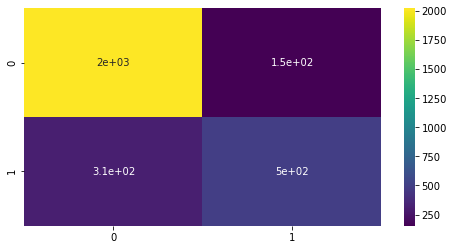

In [217]:
plt.subplots(figsize=(8, 4))
sns.heatmap(cm_xgb, annot=True, cmap="viridis")

### Receiver Operating Characteristic (ROC) Curve

Area Under the Curve: 0.77


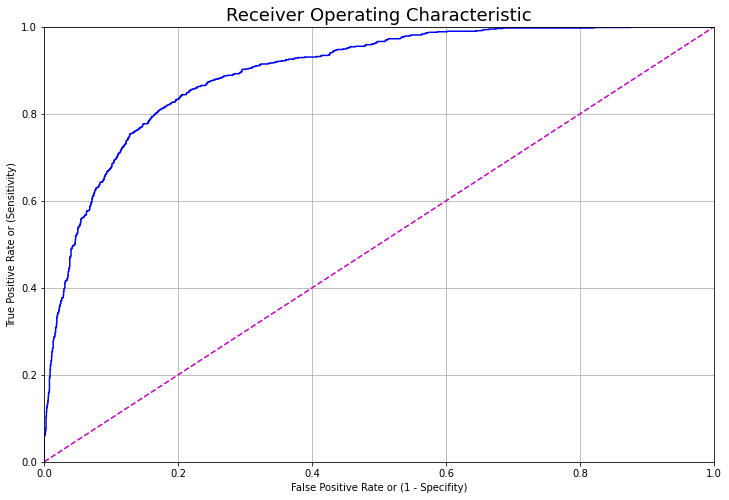

In [218]:
from sklearn.metrics import roc_curve, roc_auc_score
#Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auc = np.round(roc_auc_score(y_test, np.where(np.round(xgb_clf.predict_proba(X_test)[:, 1], 2)>=0.50, 1.0,0)), 2)
print(f'Area Under the Curve: {auc}')
# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1], 'm--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid()
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic', fontsize=18);

## 6.0 Summary

This part of the notebook covered detained data cleaning, EDA, and features engineering. The cleaned data were employed in the model building and evaluation to find excellent predictions. The utilization of the best-performed output of the grid research of selected models was carried out in a separate notebook with an additional explanation of the problem of statement and conclusion.